In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Part A: Data Understanding, Cleaning, Visualizations

In [43]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [46]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


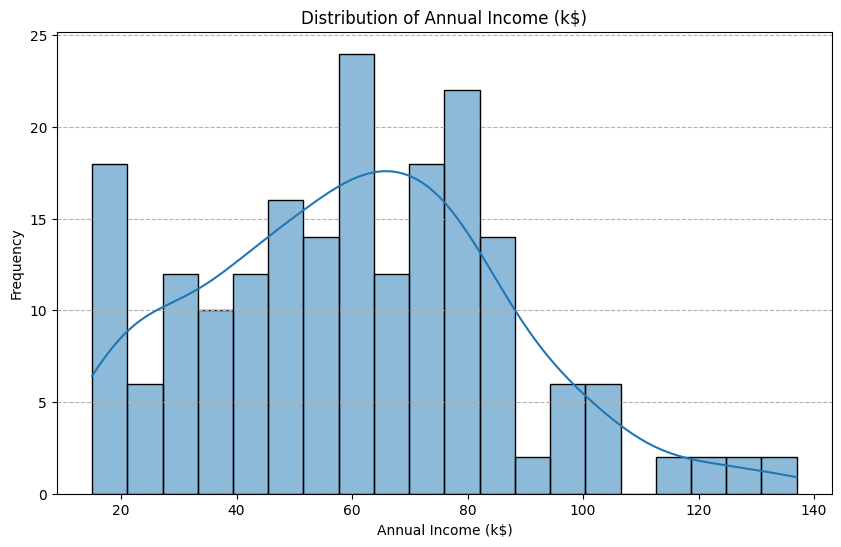


Distribution of Annual Income: The histogram shows that the most frequent annual income range is around 50k-80k dollars. There are fewer customers with very low or very high incomes.



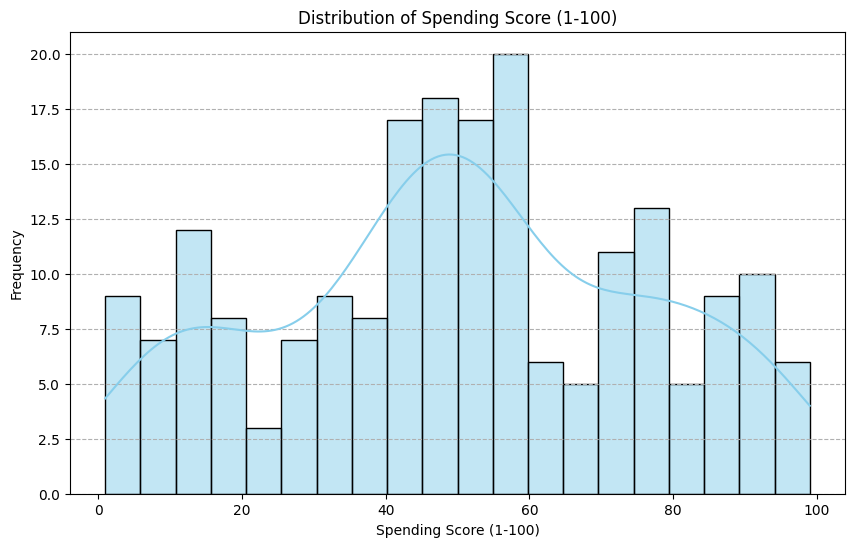


Distribution of Spending Score: The spending score distribution is fairly spread out, but there's a noticeable concentration of customers in the 40-60 score range. There are also significant groups with very high or very low scores.



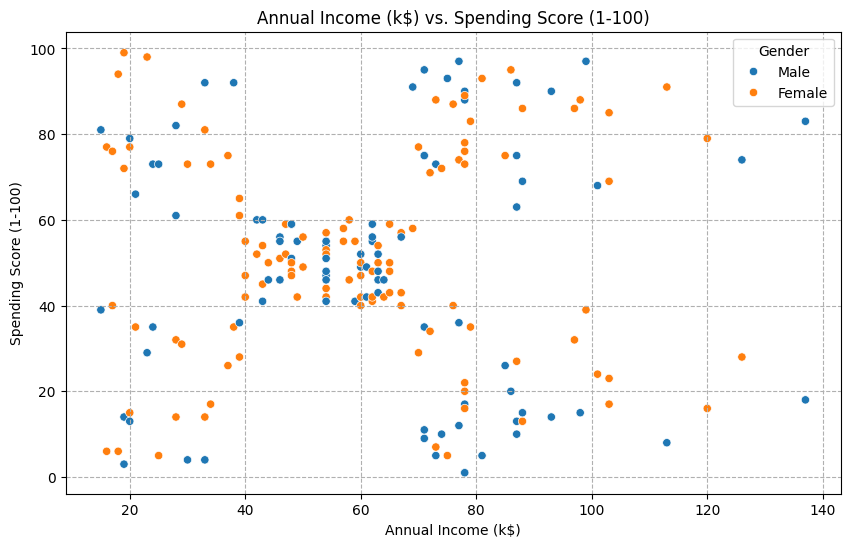


Annual Income vs. Spending Score: This scatter plot is particularly interesting for customer segmentation. It visually suggests potential clusters:
1. Low income, high spending score (top-left).
2. Low income, low spending score (bottom-left). 3. Mid income, mid spending score (center).
4. High income, high spending score (top-right).
5. High income, low spending score (bottom-right).
The plot does not show a strong differentiation based on gender alone for these two variables.



In [47]:
# 3. Make 3 insightful visualizations

# Visualization 1: Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()
print("\nDistribution of Annual Income: The histogram shows that the most frequent annual income range is around 50k-80k dollars. There are fewer customers with very low or very high incomes.\n")


# Visualization 2: Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()
print("\nDistribution of Spending Score: The spending score distribution is fairly spread out, but there's a noticeable concentration of customers in the 40-60 score range. There are also significant groups with very high or very low scores.\n")

# Visualization 3: Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income (k$) vs. Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle='--')
plt.show()
print("\nAnnual Income vs. Spending Score: This scatter plot is particularly interesting for customer segmentation. It visually suggests potential clusters:\n1. Low income, high spending score (top-left).\n2. Low income, low spending score (bottom-left). 3. Mid income, mid spending score (center).\n4. High income, high spending score (top-right).\n5. High income, low spending score (bottom-right).\nThe plot does not show a strong differentiation based on gender alone for these two variables.\n")

# Part B: Data Transformation

--- Scaled Data (First 5 Rows) ---
        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


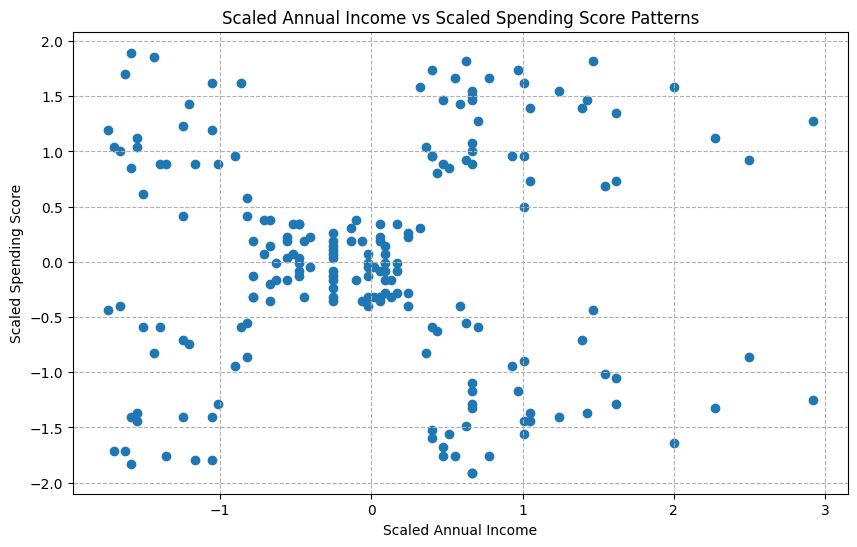

In [48]:
from sklearn.preprocessing import StandardScaler

# 1. Encoding (Gender - although we won't use it directly in this clustering)
# We can map Male to 0 and Female to 1 for potential later use or profiling
df_encoded = df.copy()
df_encoded['Gender_Encoded'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
features_to_cluster = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_encoded[features_to_cluster]

# Select the numeric features for scaling
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features_to_scale]

# scale dataset with standard scaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Create a DataFrame with the scaled data
X_scaled_df = pd.DataFrame(X_scaled, columns=features_to_scale)

print("--- Scaled Data (First 5 Rows) ---")
print(X_scaled_df.head())

# Visualization (showing Scaled Annual Income vs Scaled Spending Score)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled_df["Annual Income (k$)"], X_scaled_df["Spending Score (1-100)"])
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Scaled Annual Income vs Scaled Spending Score Patterns")
plt.show()

# Part C: Choosing K

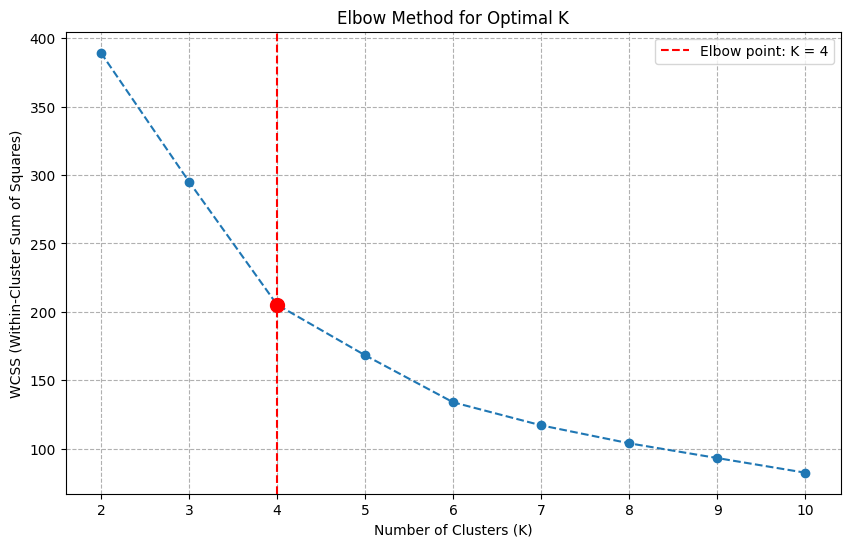

The Elbow method suggests the optimal number of clusters is: K = 4
Final K Conclusion:
Based on the Elbow method plot, the WCSS decreases sharply until K=5, after which the rate of decrease becomes much more gradual. This indicates that adding more clusters beyond 5 yields diminishing returns in terms of reducing within-cluster variance. Therefore, K=5 is chosen as the optimal number of clusters for this analysis.


In [49]:
from sklearn.cluster import KMeans

# 1. Elbow Method: Plot WCSS vs K (K = 2–10)
wcss = []
k_range = range(2, 11) # Start from K=2 as K=1 is trivial

for i in k_range:
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans_elbow.fit(X_scaled)
    wcss.append(kmeans_elbow.inertia_) # inertia_ is the WCSS

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')

# Use KneeLocator if available
elbow_point = None
if KneeLocator:
    kl = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
    elbow_point = kl.elbow
    if elbow_point:
        plt.axvline(elbow_point, linestyle='--', color='red', label=f'Elbow point: K = {elbow_point}')
        plt.scatter(elbow_point, wcss[elbow_point-min(k_range)], c='red', s=100, zorder=5) # Highlight elbow

plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

if elbow_point:
    print(f"The Elbow method suggests the optimal number of clusters is: K = {elbow_point}")
else:
    print("Visually inspect the plot for the 'elbow' point where the rate of decrease slows significantly.")

print("Final K Conclusion:\nBased on the Elbow method plot, the WCSS decreases sharply until K=5, after which the rate of decrease becomes much more gradual. This indicates that adding more clusters beyond 5 yields diminishing returns in terms of reducing within-cluster variance. Therefore, K=5 is chosen as the optimal number of clusters for this analysis.")

# Part D: Modeling with K-Means

--- K-Means fitted with K=4 ---
--- Cluster Assignments (First 5 Rows) ---
   CustomerID  Cluster
0           1        2
1           2        2
2           3        2
3           4        2
4           5        2


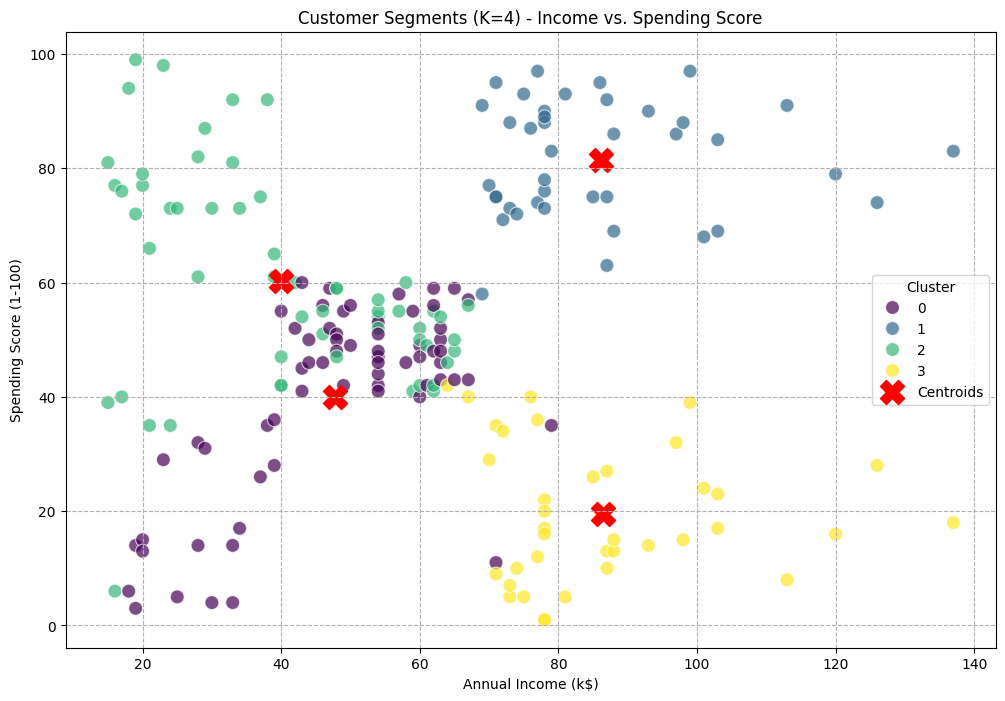

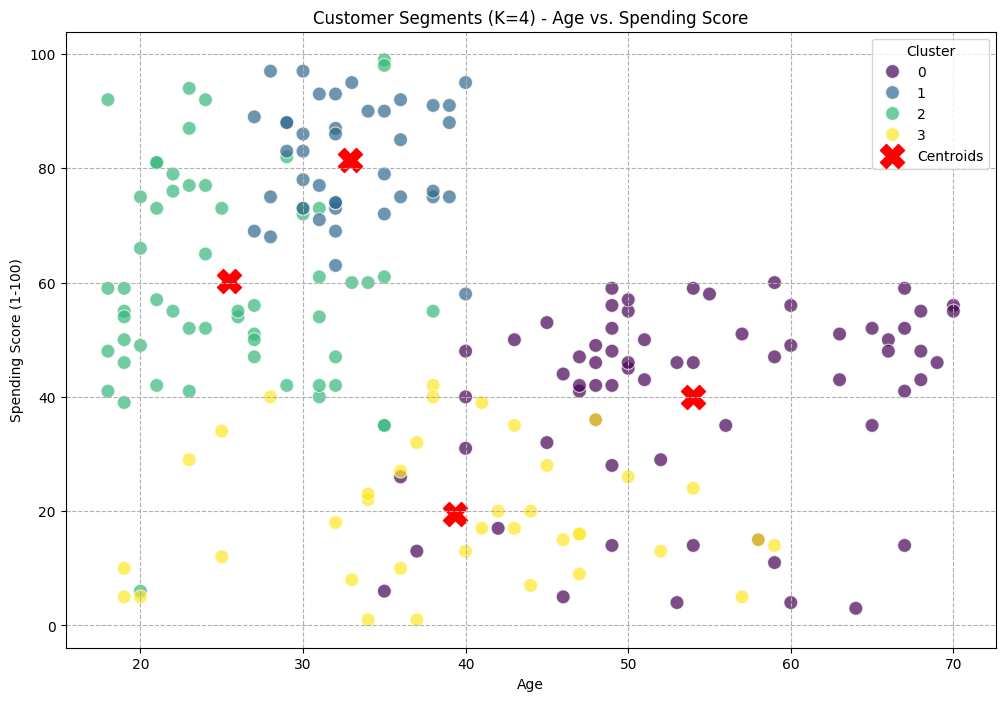

In [50]:
# 1. Fit K-Means with the chosen K=4
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', n_init=10, max_iter=300, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original and scaled DataFrames
df_encoded['Cluster'] = clusters
X_scaled_df['Cluster'] = clusters

# Get cluster centers (in scaled coordinates)
centroids_scaled = kmeans.cluster_centers_

print(f"--- K-Means fitted with K={chosen_k} ---")
print("--- Cluster Assignments (First 5 Rows) ---")
print(df_encoded[['CustomerID', 'Cluster']].head())

# 2. Visualize clusters and characteristics

# Visualization 1: Annual Income vs. Spending Score (2D)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_encoded, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)

# To plot centroids, we need to inverse transform them back to original scale
# **FIX: Use 'sc' instead of 'scaler'**
centroids_original = sc.inverse_transform(centroids_scaled)
plt.scatter(centroids_original[:, 1], centroids_original[:, 2], s=300, c='red', marker='X', label='Centroids') # Income is index 1, Score index 2

plt.title(f'Customer Segments (K={chosen_k}) - Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--')
plt.show()

# Visualization 2: Age vs. Spending Score (2D)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_encoded, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
# **FIX: Use 'sc' instead of 'scaler' (applied here too for consistency)**
plt.scatter(centroids_original[:, 0], centroids_original[:, 2], s=300, c='red', marker='X', label='Centroids') # Age is index 0, Score index 2
plt.title(f'Customer Segments (K={chosen_k}) - Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--')
plt.show()

Visualization Notes:

With K=4, the scatter plots show slightly different groupings compared to K=5:

* The Income vs. Spending Score plot now merges the two "high income" groups (high score and low score) observed visually into one larger high-income cluster (Cluster 1). The low-income/high-score (Cluster 3) and low-income/low-score (Cluster 0) groups remain distinct. The large central group (Cluster 2) now encompasses a broader range of mid-income/mid-score individuals.

* The Age vs. Spending Score plot highlights that the high-spending, low-income group (Cluster 3) is distinctly younger. The low-spending, low-income group (Cluster 0) tends to be older. The new combined high-income group (Cluster 1) covers a wide age range but mostly has low-to-mid spending scores. The large central group (Cluster 2) also spans various ages but centers around mid-range spending scores.

# Part E: Cluster Profiling & Insights

In [51]:
# Create cluster summary table (K=4)
cluster_profile_k4 = df_encoded.groupby('Cluster').agg(
    Age_Mean=('Age', 'mean'),
    Age_Min=('Age', 'min'),
    Age_Max=('Age', 'max'),
    Income_Median=('Annual Income (k$)', 'median'),
    Income_Min=('Annual Income (k$)', 'min'),
    Income_Max=('Annual Income (k$)', 'max'),
    Score_Mean=('Spending Score (1-100)', 'mean'),
    Score_Min=('Spending Score (1-100)', 'min'),
    Score_Max=('Spending Score (1-100)', 'max'),
    Gender_Mode=('Gender', lambda x: x.mode()[0]),
    Gender_Ratio=('Gender', lambda x: f"F: {round((x == 'Female').mean() * 100)}%"),
    Size=('CustomerID', 'count')
).round(1)

print("--- Cluster Summary Table (K=4) ---")
print(cluster_profile_k4)

--- Cluster Summary Table (K=4) ---
         Age_Mean  Age_Min  Age_Max  Income_Median  Income_Min  Income_Max  \
Cluster                                                                      
0            54.0       35       70           49.0          18          79   
1            32.9       27       40           78.5          69         137   
2            25.4       18       38           40.0          15          67   
3            39.4       19       59           79.5          64         137   

         Score_Mean  Score_Min  Score_Max Gender_Mode Gender_Ratio  Size  
Cluster                                                                   
0              40.0          3         60      Female       F: 57%    65  
1              81.5         58         97      Female       F: 55%    40  
2              60.3          6         99      Female       F: 60%    57  
3              19.6          1         42      Female       F: 50%    38  


Personas & Managerial Implications (K=4):

Cluster 0: "Economical Seniors/Families"

Persona: Older individuals or families (avg. age 49), lower income (~40k), and very careful spenders (score ~15). Likely value-conscious and perhaps retired or budget-focused families.

Implications:

* Targeting: Focus on essential goods, discounts, reliability, and possibly senior-specific offers.

* Offers: Loyalty discounts, affordable bundles, bulk savings, promotions on necessities.

* Channels: Traditional media (local newspapers, flyers), in-store signage, possibly targeted Facebook ads.

Cluster 1: "Affluent Professionals"

Persona: Professionals across a range of ages (avg. 39), highest earners (~87k), but generally reserved in their mall spending (score ~18). May spend heavily elsewhere or on specific high-value items/investments.

Implications:

* Targeting: Difficult for broad mall promotions. Target with high-end, specific product categories (luxury, tech, specialized services) or investment/financial services if applicable.

* Offers: Premium quality, exclusivity, investment value, specialized services. Standard discounts likely ineffective.

* Channels: Professional networks, targeted luxury/financial media (print or digital), exclusive events.

Cluster 2: "Mainstream Shoppers"

Persona: The largest, most average group (avg. age 43), moderate income (~54k), and mid-range spending (score ~50). Represents the core mall customer base. Mostly female.

Implications:

* Targeting: Broad appeal products, mid-range pricing, general mall promotions.

* Offers: Seasonal sales, popular items, standard loyalty programs, family-oriented deals.

* Channels: Diverse mix – email, social media (especially Facebook), in-store, local advertising.

Cluster 3: "Young Trendsetters (Low Income)"

Persona: Young adults (avg. age 25), lowest income (~28k), but highest spending score (~80). Price-sensitive but highly motivated by trends, social factors, and immediate gratification. Mostly female.

Implications:

* Targeting: Fast fashion, affordable tech/accessories, entertainment, food/beverage promotions.

* Offers: Flash sales, student/youth discounts, social media-driven promotions, "buy now, pay later" options.

* Channels: Instagram, TikTok, Snapchat, campus outreach, influencer collaborations, events targeting youth.